<a href="https://colab.research.google.com/github/deepikaunited/Projectwork/blob/main/final_image_segementation_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pwd

/content


In [ ]:
%cd /content/sample_data

/content/sample_data


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving noisey_image.jpg to noisey_image.jpg


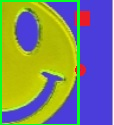

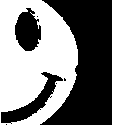

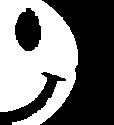

-1

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load image, grayscale, Otsu's threshold
image = cv2.imread('noisey_image.jpg')
original = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# Morph open to remove noise
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)

# Find contours, obtain bounding box, extract and save ROI
ROI_number = 0
cnts = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
    ROI = original[y:y+h, x:x+w]
    cv2.imwrite('ROI_{}.png'.format(ROI_number), ROI)
    ROI_number += 1

cv2_imshow(image)
cv2_imshow(thresh)
cv2_imshow(opening)
cv2.waitKey()

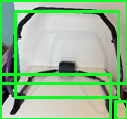

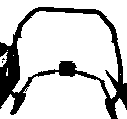

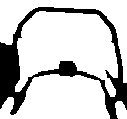

-1

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load image, grayscale, Otsu's threshold
image = cv2.imread('sample2.jpg')
original = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# Morph open to remove noise
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)

# Find contours, obtain bounding box, extract and save ROI
ROI_number = 0
cnts = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
    ROI = original[y:y+h, x:x+w]
    cv2.imwrite('ROI_{}.png'.format(ROI_number), ROI)
    ROI_number += 1

cv2_imshow(image)
cv2_imshow(thresh)
cv2_imshow(opening)
cv2.waitKey()